<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/ML/math/%E1%84%92%E1%85%AA%E1%86%A8%E1%84%85%E1%85%B2%E1%86%AF%E1%84%86%E1%85%B5%E1%86%BE%E1%84%90%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A85_%E1%84%8B%E1%85%B5%E1%84%89%E1%85%A1%E1%86%AB%E1%84%92%E1%85%AA%E1%86%A8%E1%84%85%E1%85%B2%E1%86%AF%E1%84%87%E1%85%A7%E1%86%AB%E1%84%89%E1%85%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이산 확률변수

## 1차원 이산형 확률변수


#### 이산형 vs 연속형
- 이산형 : 셀 수 있는 데이터
- 연속형 : 값들 사이에 무수히 많은 값들이 존재가능한 데이터(셀수 없음)


#### 이산형 확률변수 vs 연속형 확률변수
- 이산형 확률변수 : 확률변수로 취할 수 있는 값들이 셀 수 있는 데이터
- 연속형 확률변수 : 확률변수로 취할 수 있는 값들이 셀 수 없는 데이터

### 확률질량함수(Probability Mass Function)

확률변수 X가 $x_k$라는 값을 취할 확률
$$
P(X=x_k) = p_k(k=1,2,...)
$$
$$
f(x) = P(X=x)
$$
f(x)로 표현한 함수를 확률질량함수, 또는 확률함수라고 한다.



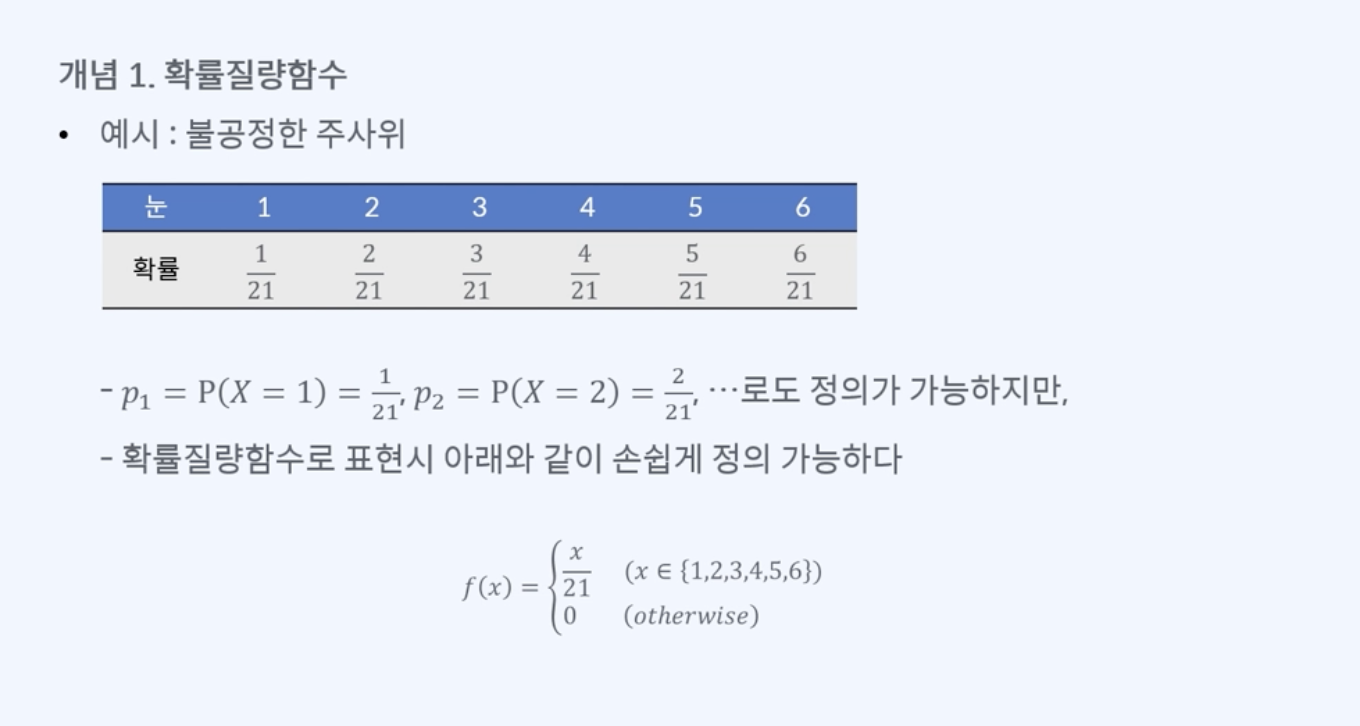

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [12]:
x_set = np.array([1,2,3,4,5,6])

In [13]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [17]:
# 확률 p_k = p(x_k) 계산
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식(dictionary type)으로 표시

'''
1/21, 2/21, 3/21, 4/21, 5/21, 6/21
'''
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

#### 확률의 성질
- 확률은 2가지 식을 만족해야 한다.
    1. 확률이 절대적으로 0이상이어야 한다.
    2. 모든 확률을 더하면 1이 되어야 한다.

In [18]:
# 확률이 모두 0이상인지 여부 확인 -> 모든 요소가 참일 떄만 참을 반환하는 np.all
np.all(prob >= 0)

True

In [19]:
np.sum(prob)

1.000

### 누적분포함수(Cumulative Distribution Function:CDF)
- 누적분포함수 $P(X \leq x)$
- 확률변수 X가 x이하가 될 때의 확률을 반환하는 함수
$$
F(x) = P(X \leq x) = ∑f(x_k)
$$

In [21]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <=x])

In [23]:
# 눈이 3까지 나올수 있는 누적분포함수
F(3)

0.286

In [27]:
# 확률변수의 변환
# 예) 2X+3 확률변수
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])

# 변환된 값들의 확률변수
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

## 1차원 이산형 확률변수의 지표
|1차원 데이터 지표|1차원 확률변수|
|------|------|
|평균(Mean/Average)|기대값(Expectation)|
|분산(Variance)|분산(Variance)|

#### 기대값(Expectation, Expected Value)
- 확률변수의 평균
- 이산형 확률변수의 평균
    - 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합으로 정의한다.
- $ \mu $로 표현한다.
$$
\mu = E(X) = ∑x_kf(x_k)
$$

In [29]:
# 불공정한 주사위의 기대값
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [30]:
# 이상적인 기대값 계산 방법인, 무제한 시행을 통해서 실현값의 평균 계산
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.336

In [31]:
 def E(X, g=lambda x: x):
    x_set, f= X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [34]:
# g(X) = X일 때
E(X)

4.333

In [35]:
# g(X) = 2X +3일 때
E(X, g=lambda x: 2*x+3)

11.667

##### 기대값의 선형성
$$
E(aX + b) = aE(X) + b
$$

In [36]:
# 기대값의 선형성
2*E(X)+3

11.667

#### 분산(Variance)
- 편차 제곱의 기대값으로 정의된다.
- $ σ(시그마) $를 기호로 사용하고 $ σ^2 $ 혹은 V(X)로 표기한다.
- $ σ$는 확률변수 X의 표준편차를 나타낸다.
$$
σ^2 = V(X) = ∑(x_k - E(X))^2f(x_k)
$$

In [37]:
# numpy를 이용한 불공정한 주사위의 분산
mean = E(X)
np.sum([(x_k - mean)**2*f(x_k) for x_k in x_set])

2.222

##### 변환된 확률변수의 분산
$$
V(g(X)) = ∑(g(x_k) - E(g(X))^2f(x_k)
$$

In [38]:
def V(X, g=lambda x: x):
    x_set, f=X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [39]:
V(X)

2.222

In [41]:
# 변환된 확률변수의 분산 2X+3
V(X, lambda x: 2*x+3)

8.889

##### 분산의 선형성
$$
V(aX + b) = a^2V(X)
$$

In [43]:
# 분산의 선형성
2**2 * V(X)

8.889

## 2차원 이산형 확률변수
- 1차원 확률분포 2개(X,Y)를 동시에 다룬다.
- 각 확률변수가 취할 수 있는 값의 조합으로 이루어진 집합과 그 확률에 의 해 정의된다.

### 결합확률분포(Joint Probability Distribution)
- (X,Y)가 취할 수 있는 값의 조합으로 이루어진 집합
$$
\{(x_i,y_i)|i=1,2...;j=1,2,...\}
$$
- 각각 조합에 맞는 확률
$$
P(X=x_i,Y=y_j) = p_{ij}(i=1,2...;j=1,2,...)
$$
- 확률변수(X,Y)의 움직임을 동시에 고려한 분포

예시

- X는 불공정한 주사위 A와 B 2개의 눈을 더한것,Y는 불공정한 주사위 A의 눈으로 가정한다
- X가 취할 수 있는 값의 집합 = {2,3,4,5,6,7,8,9,10,11,12}
- Y가 취할 수 있는 값의 집합 = {1,2,3,4,5,6}
- X=9,Y=4일때의 확률은? A=4,B=5의눈이나올확률
$$
\frac{4}{21} × \frac{5}{21} = \frac{20}{441}
$$

결합확률함수(Joint Probability Function)
$$
P(X=x,Y=y) = f_{xy}(x,y)
$$

불공정한 주사위 예시

$f_{xy}(x,y) =
\begin{cases}
\frac{y}{21} × \frac{x-y}{21} \\
0
\end{cases}$

In [44]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [45]:
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return y * (x-y) / 441
    else:
        return 0

In [47]:
prob = np.array(
    [
        [
            f_XY(x_i, y_j) for y_j in y_set
        ]
        for x_i in x_set
    ]
)

In [49]:
prob

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

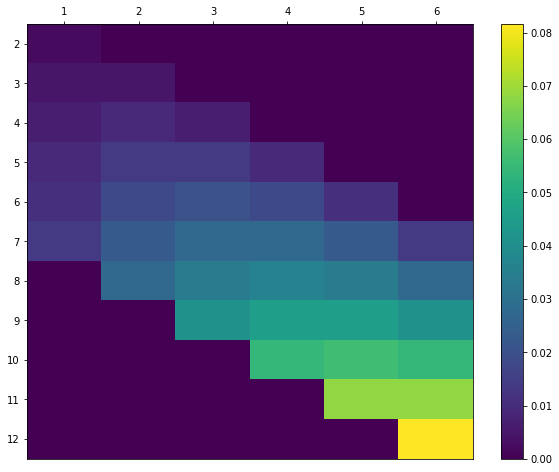

In [48]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(1, 1, 1)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)

# y축을 내림차순의 숫자가 되도록 위 아래를 반전한다
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [ ]:
np.all(prob >= 0)

True

In [ ]:
np.sum(prob)

1.000

### 주변확률분포(Marginal Probability Distribution)
- 결합확률분포 $f_{xy}(x,y)$에서  
개별 확률변수 X의 확률분포 $f_x(x)$만을 살펴볼때
$$
f_x(x) = \sum f_{xy}(x,y_k)
$$

In [51]:
def f_X(x):
    return np.sum(
        [
            f_XY(x, y_k) 
            for y_k in y_set
        ]
    )

In [52]:
def f_Y(y):
    return np.sum(
        [
            f_XY(x_k, y)
            for x_k in x_set
        ]
    )

In [53]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [54]:
prob_x = np.array(
    [
        f_X(x_k) 
        for x_k in x_set
    ]
)
prob_y = np.array(
    [
        f_Y(y_k) 
        for y_k in y_set
    ]
)

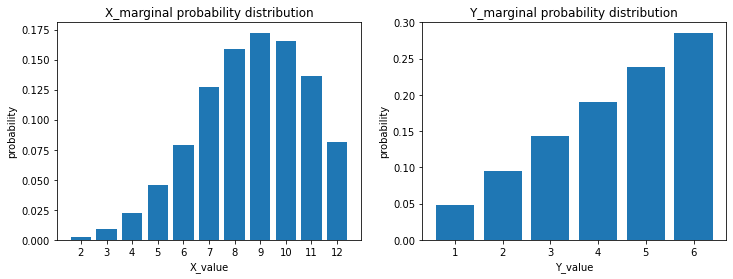

In [55]:
fig = plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

## 이차원 이산형 확률변수 지표
기대값, 분산, 공분산, 상관계수

### 1. 기대값


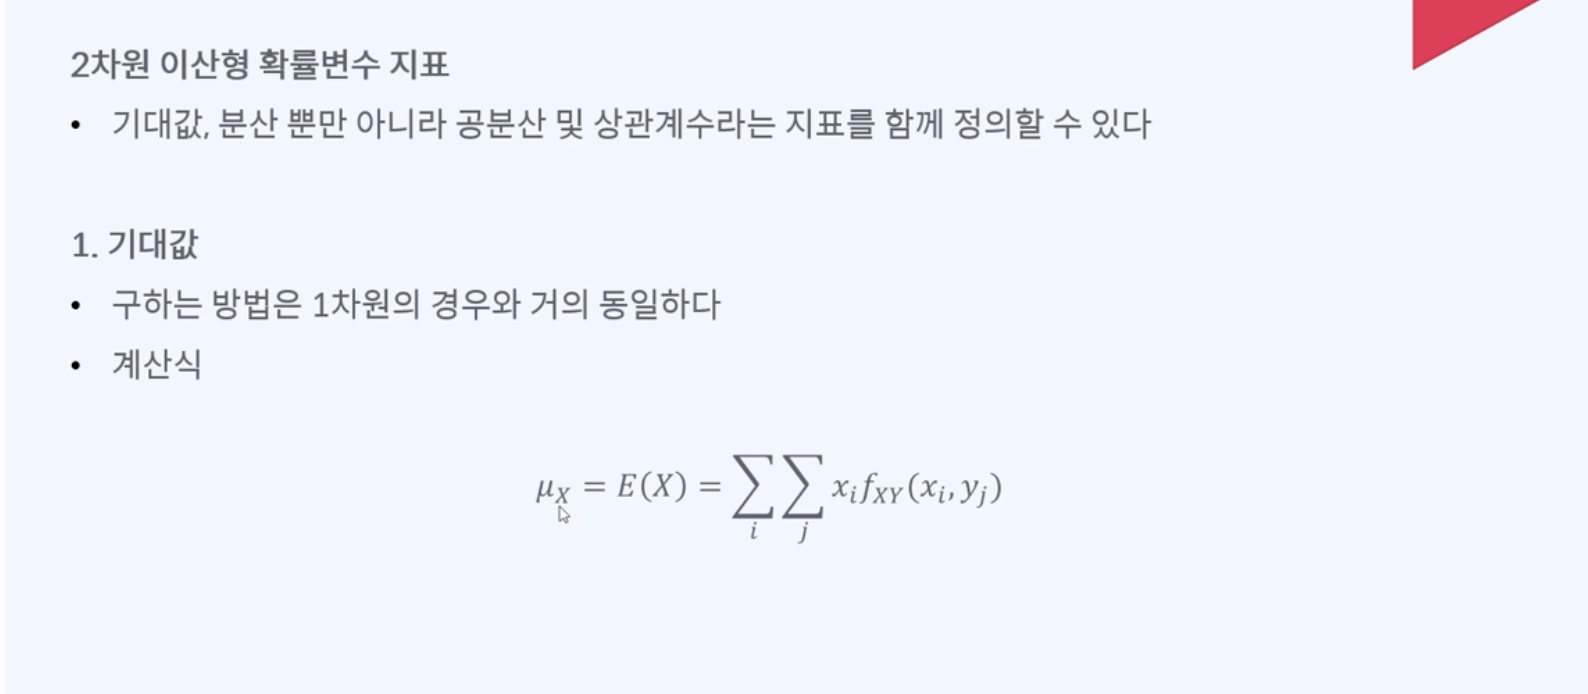

In [56]:
# x 기대값 구현
np.sum(
    [
        x_i * f_XY(x_i, y_j)
        for x_i in x_set
        for y_j in y_set
    ]
)

8.667

#### 기대값의 일반화 
$ E(g(X,Y)) $

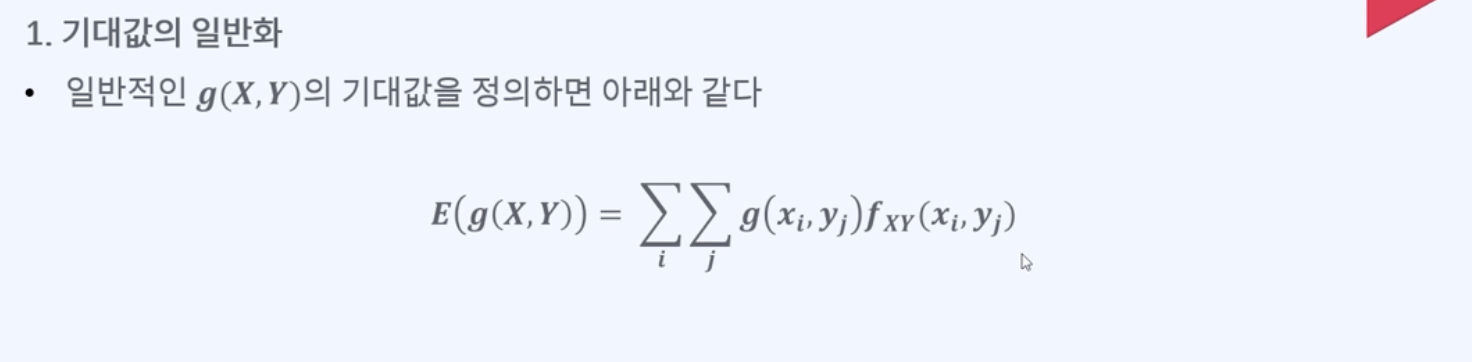

In [58]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum(
        [
            g(x_i, y_j) * f_XY(x_i, y_j)
            for x_i in x_set
            for y_j in y_set
        ]
    )

In [59]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [60]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

#### 기대값의 선형성이 성립한다.

In [61]:
a, b = 2, 3

In [62]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [63]:
a * mean_X + b * mean_Y

30.333

In [ ]:
np.sum(
    [
        (x_i-mean_X)**2 * f_XY(x_i, y_j)
        for x_i in x_set
        for y_j in y_set
    ]
)

4.444

### 분산

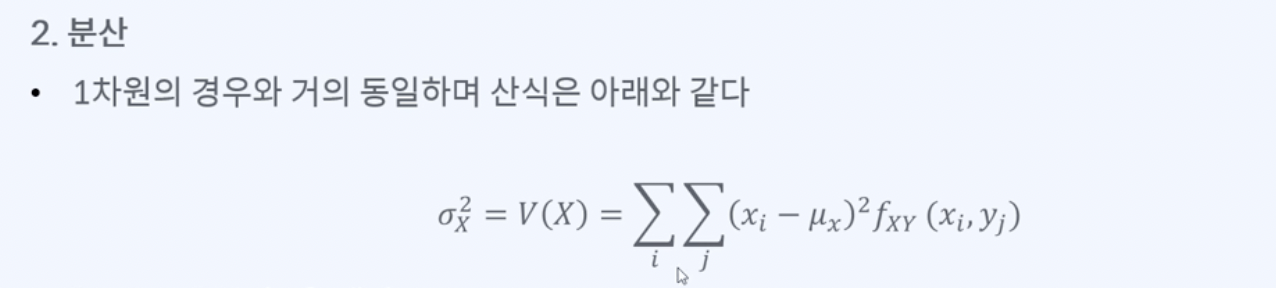

In [72]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum(
        [
            (g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
            for x_i in x_set
            for y_j in y_set
        ]
    )

In [73]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [74]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

### 공분산

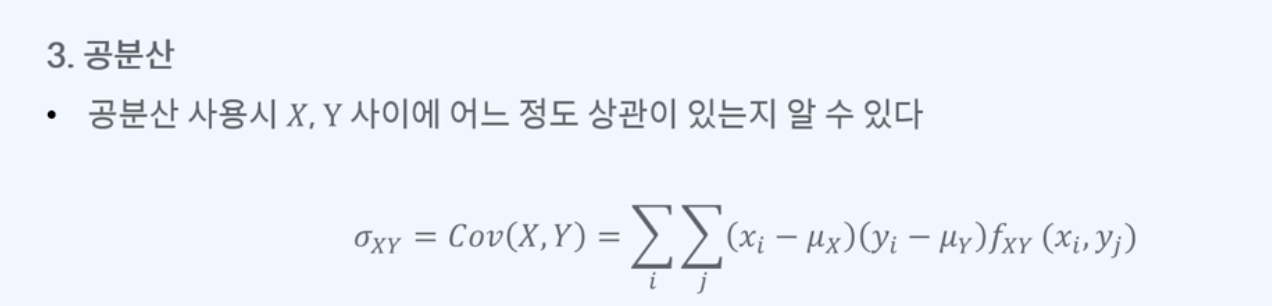

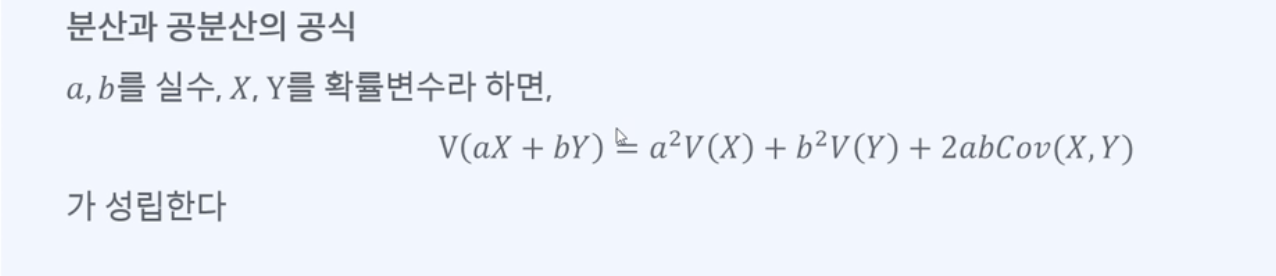

In [75]:
def COV(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum(
        [
            (x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
            for x_i in x_set
            for y_j in y_set
        ]
    )

In [76]:
cov_xy = COV(XY)
cov_xy

2.222

In [77]:
V(XY, lambda x, y: 2*x + 3*y)

64.444

In [78]:
2**2 * var_X + 3**2 * var_Y + 2*2*3 * cov_xy

64.444

### 상관계수

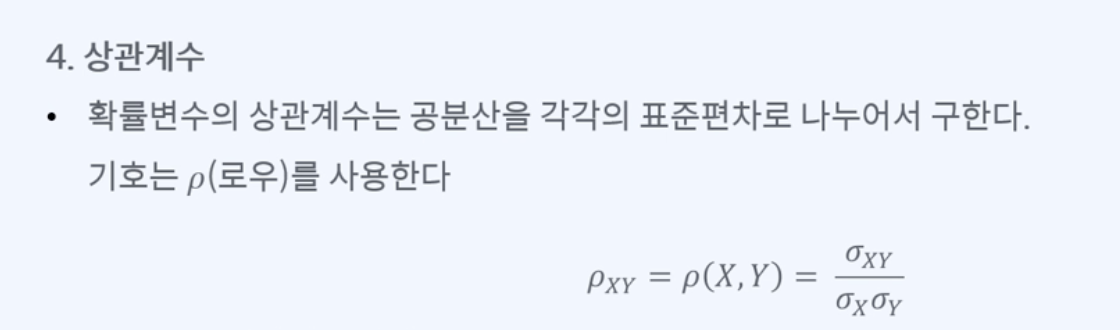

In [79]:
cov_xy / np.sqrt(var_X * var_Y)

0.707